In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import keras

In [2]:
col_names = ["Date/Time", "KW"]
df = pd.read_csv("Combined.csv")
df = df.rename({'Meter ID         ': 'Meter_ID', 'Date / Time           ': 'Date&Time', 'KW(ch: 1  set:1)    ': 'KW', 'KVA(ch: 2  set:1)   ': 'KVA', 'PF(1(ch: 2  set:1)  ':'PF'}, axis='columns')
df = df[['Date&Time','KW']]
df['Date&Time'] = df['Date&Time'].apply(lambda x: x.strip())
#df['Date&Time'] = pd.to_datetime(df['Date&Time'],infer_datetime_format=True)
#df['Date&Time'] = pd.to_datetime(df['Date&Time']).dt.to_period('D')

In [3]:
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

      Date&Time     KW
0  1/1/21 00:15  91.36
1  1/1/21 00:30  85.04 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57692 entries, 0 to 57691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date&Time  57692 non-null  object 
 1   KW         57692 non-null  float64
dtypes: float64(1), object(1)
memory usage: 901.6+ KB
None 

Describe the Dataset  

                 KW
count  57692.000000
mean     104.555698
std       30.870285
min        0.000000
25%       77.640000
50%      106.480000
75%      125.520000
max      206.560000 

Null Values t  

Date&Time    0
KW           0
dtype: int64 



In [4]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Date&Time"]).dt.month
dataset["Year"] = pd.to_datetime(df["Date&Time"]).dt.year
dataset["Date"] = pd.to_datetime(df["Date&Time"]).dt.date
dataset['Hour'] = pd.to_datetime(df['Date&Time']).dt.hour
dataset['Time'] = pd.to_datetime(df['Date&Time']).dt.strftime('%H:%M:%S')
dataset["Week"] = pd.to_datetime(df["Date&Time"]).dt.week
dataset["Day"] = pd.to_datetime(df["Date&Time"]).dt.day_name()
dataset = df.set_index("Date&Time")
dataset.index = pd.to_datetime(dataset.index)


C:\Users\shrad\AppData\Local\Temp/ipykernel_20628/888630616.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["Date&Time"]).dt.week


In [5]:
dataset.head()

,KW,Month,Year,Date,Hour,Time,Week,Day
Date&Time,,,,,,,,
2021-01-01 00:15:00,91.36,1,2021,2021-01-01,0,00:15:00,53,Friday
2021-01-01 00:30:00,85.04,1,2021,2021-01-01,0,00:30:00,53,Friday
2021-01-01 00:45:00,87.52,1,2021,2021-01-01,0,00:45:00,53,Friday
2021-01-01 01:00:00,87.28,1,2021,2021-01-01,1,01:00:00,53,Friday
2021-01-01 01:15:00,89.12,1,2021,2021-01-01,1,01:15:00,53,Friday


In [6]:
print(dataset.Year.unique())

[2021 2022]


In [7]:
dataset.head(2)

,KW,Month,Year,Date,Hour,Time,Week,Day
Date&Time,,,,,,,,
2021-01-01 00:15:00,91.36,1,2021,2021-01-01,0,00:15:00,53,Friday
2021-01-01 00:30:00,85.04,1,2021,2021-01-01,0,00:30:00,53,Friday


In [8]:
dataset

,KW,Month,Year,Date,Hour,Time,Week,Day
Date&Time,,,,,,,,
2021-01-01 00:15:00,91.36,1,2021,2021-01-01,0,00:15:00,53,Friday
2021-01-01 00:30:00,85.04,1,2021,2021-01-01,0,00:30:00,53,Friday
2021-01-01 00:45:00,87.52,1,2021,2021-01-01,0,00:45:00,53,Friday
2021-01-01 01:00:00,87.28,1,2021,2021-01-01,1,01:00:00,53,Friday
2021-01-01 01:15:00,89.12,1,2021,2021-01-01,1,01:15:00,53,Friday
...,...,...,...,...,...,...,...,...
2022-08-24 23:00:00,118.64,8,2022,2022-08-24,23,23:00:00,34,Wednesday
2022-08-24 23:15:00,109.92,8,2022,2022-08-24,23,23:15:00,34,Wednesday
2022-08-24 23:30:00,108.88,8,2022,2022-08-24,23,23:30:00,34,Wednesday


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Month')

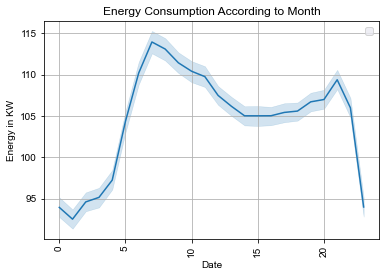

In [9]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

plt.style.use('ggplot')

sns.lineplot(x="Hour", y="KW", data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2021")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Month")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Day')

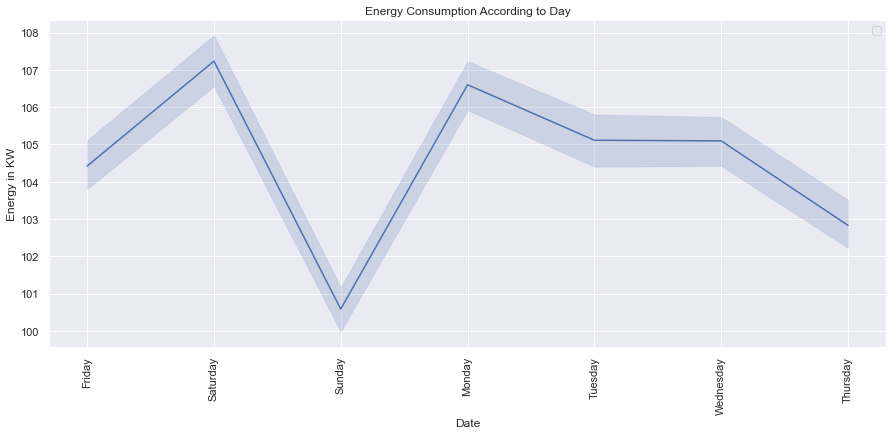

In [10]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

plt.style.use('ggplot')

sns.lineplot(x="Day", y="KW", data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2021")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Day")

C:\Users\shrad\AppData\Local\Temp/ipykernel_20628/1679377790.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2004 = dataset["2021"]["KW"].to_list()
C:\Users\shrad\AppData\Local\Temp/ipykernel_20628/1679377790.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2004 = dataset["2021"]["Date"].to_list()
C:\Users\shrad\AppData\Local\Temp/ipykernel_20628/1679377790.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2005 = dataset["2022"]["KW"].to_list()
C:\Users\shrad\AppData\Loc

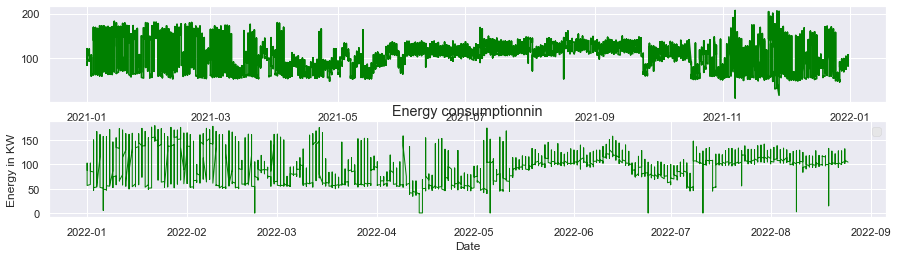

In [11]:
fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
# ax3= fig.add_subplot(313)


plt.style.use('ggplot')

y_2004 = dataset["2021"]["KW"].to_list()
x_2004 = dataset["2021"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2022"]["KW"].to_list()
x_2005 = dataset["2022"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


# y_2006 = dataset["3"]["KW"].to_list()
# x_2006 = dataset["3"]["Date"].to_list()
# ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True, alpha=1)
plt.legend()


C:\Users\shrad\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

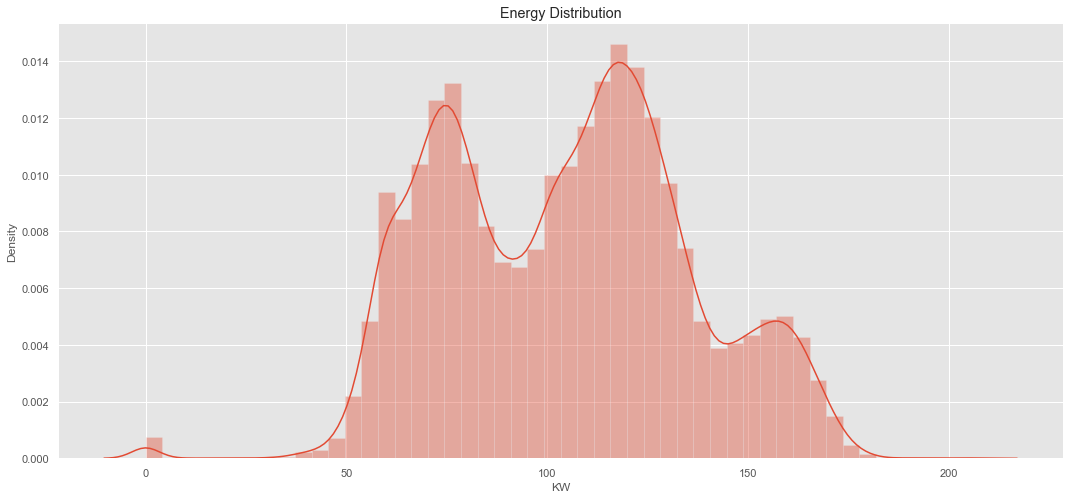

In [12]:
sns.distplot(dataset["KW"])
plt.title("Energy Distribution")

No handles with labels found to put in legend.


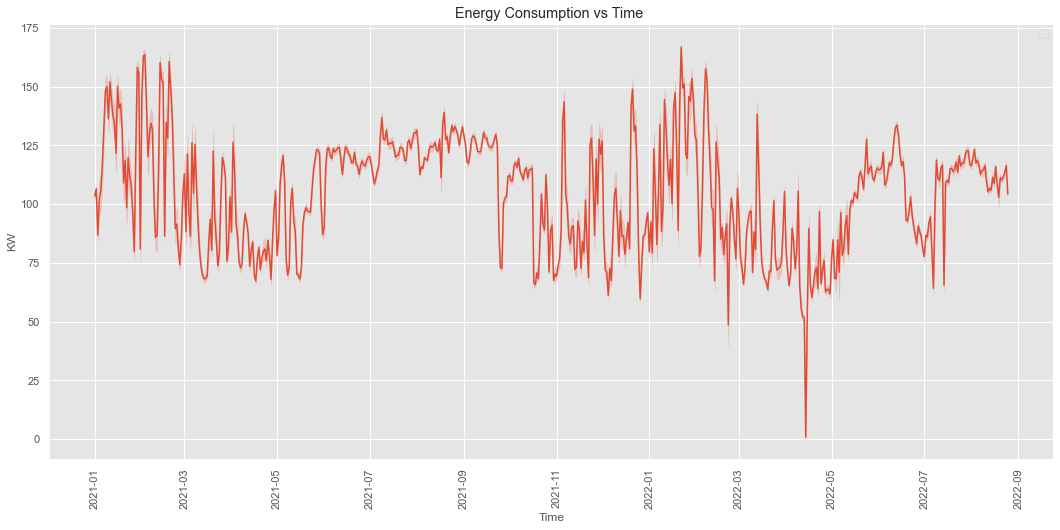

In [13]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

plt.style.use('ggplot')
sns.lineplot(x='Date',y='KW', data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57692 entries, 0 to 57691
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date&Time  57692 non-null  object 
 1   KW         57692 non-null  float64
 2   Month      57692 non-null  int64  
 3   Year       57692 non-null  int64  
 4   Date       57692 non-null  object 
 5   Hour       57692 non-null  int64  
 6   Time       57692 non-null  object 
 7   Week       57692 non-null  int64  
 8   Day        57692 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.0+ MB


No handles with labels found to put in legend.


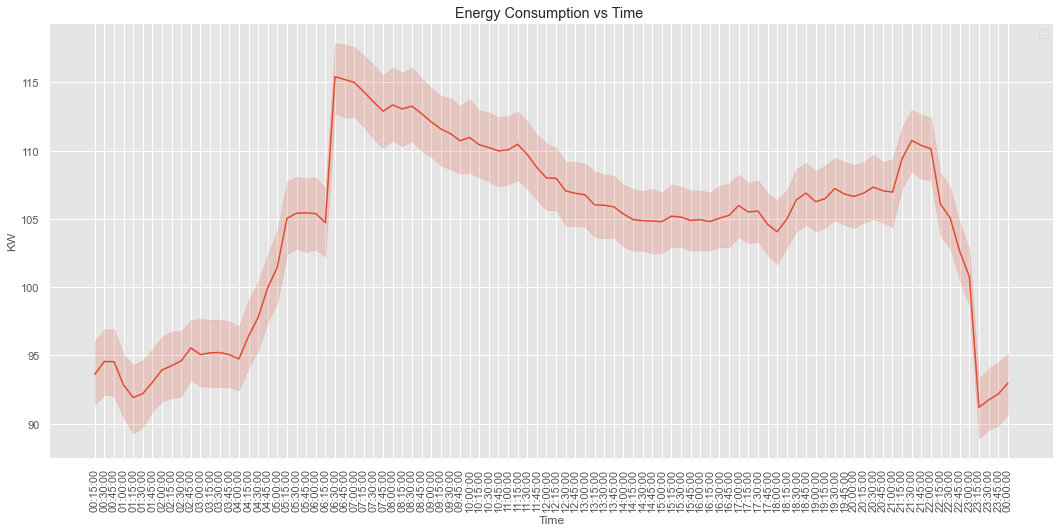

In [15]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

plt.style.use('ggplot')
sns.lineplot(x= df['Time'] , y= df['KW'], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

<AxesSubplot:xlabel='Date&Time'>

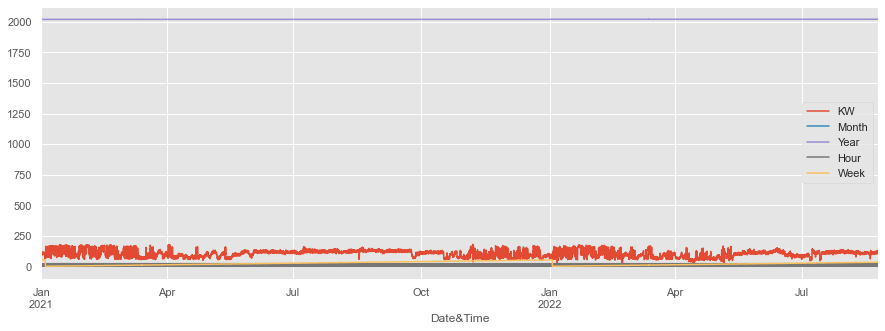

In [16]:
NewDataSet = dataset.resample('H').mean()
NewDataSet.plot(figsize=(15,5))

In [17]:
NewDataSet.dropna(inplace=True)

In [18]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (57692, 8)
New  Dataset  (14423, 5)


In [19]:
TestData = NewDataSet.tail(2800)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [20]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (14363, 1)
Test Set Shape  (2800, 5)


In [21]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [22]:
Training_Set.values

array([[ 87.97333333],
       [ 86.76      ],
       [ 88.26      ],
       ...,
       [122.        ],
       [119.02      ],
       [112.56      ]])

In [23]:
#Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [24]:
Train

array([[0.48841513],
       [0.48167888],
       [0.49000666],
       ...,
       [0.67732623],
       [0.6607817 ],
       [0.62491672]])

In [25]:
import numpy as np

In [26]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(14303, 60, 1)
(14303, 1)


In [27]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(14303, 60, 1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout

In [29]:
regressor = keras.models.Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['MeanAbsoluteError','RootMeanSquaredError',
                                                                            'MeanSquaredError'])

In [30]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [31]:
regressor.fit(X_Train, Y_Train, epochs = 10, batch_size = 32)

Epoch 1/10
447/447 [==============================] - 31s 60ms/step - loss: 0.0204 - mean_absolute_error: 0.1062 - root_mean_squared_error: 0.1430 - mean_squared_error: 0.0204
Epoch 2/10
447/447 [==============================] - 27s 61ms/step - loss: 0.0133 - mean_absolute_error: 0.0853 - root_mean_squared_error: 0.1155 - mean_squared_error: 0.0133
Epoch 3/10
447/447 [==============================] - 27s 61ms/step - loss: 0.0099 - mean_absolute_error: 0.0717 - root_mean_squared_error: 0.0993 - mean_squared_error: 0.0099
Epoch 4/10
447/447 [==============================] - 30s 68ms/step - loss: 0.0084 - mean_absolute_error: 0.0646 - root_mean_squared_error: 0.0916 - mean_squared_error: 0.0084
Epoch 5/10
447/447 [==============================] - 31s 70ms/step - loss: 0.0078 - mean_absolute_error: 0.0610 - root_mean_squared_error: 0.0884 - mean_squared_error: 0.0078
Epoch 6/10
447/447 [==============================] - 28s 62ms/step - loss: 0.0073 - mean_absolute_error: 0.0582 - root_

In [33]:
TestData

,KW,Month,Year,Hour,Week
Date&Time,,,,,
2022-04-30 09:00:00,58.56,4.0,2022.0,9.0,17.0
2022-04-30 10:00:00,62.42,4.0,2022.0,10.0,17.0
2022-04-30 11:00:00,64.50,4.0,2022.0,11.0,17.0
2022-04-30 12:00:00,67.40,4.0,2022.0,12.0,17.0
2022-04-30 13:00:00,67.26,4.0,2022.0,13.0,17.0
...,...,...,...,...,...
2022-08-24 20:00:00,124.56,8.0,2022.0,20.0,34.0
2022-08-24 21:00:00,122.46,8.0,2022.0,21.0,34.0
2022-08-24 22:00:00,119.26,8.0,2022.0,22.0,34.0


In [34]:
Df_Total = pd.concat((NewDataSet[["KW"]], TestData[["KW"]]), axis=0)

In [77]:
Df_Total

,KW
Date&Time,
2021-01-01 00:00:00,87.973333
2021-01-01 01:00:00,86.760000
2021-01-01 02:00:00,88.260000
2021-01-01 03:00:00,89.340000
2021-01-01 04:00:00,87.820000
...,...
2022-08-24 20:00:00,124.560000
2022-08-24 21:00:00,122.460000
2022-08-24 22:00:00,119.260000


In [86]:
Df_Total.to_csv('future_values.csv')

In [78]:
#Testing
D=Df_Total.reset_index()
D

,Date&Time,KW
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [79]:
D.rename(columns={'index': 'Date&Time', 'KW': 'Actual'}, inplace=True)
D

,Date&Time,Actual
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [80]:
D['Forecast'] = np.nan
D['Forecast'].iloc[-1] = D['Actual'].iloc[-1]
D

C:\Users\shrad\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Date&Time,Actual,Forecast
0,2021-01-01 00:00:00,87.973333,NaN
1,2021-01-01 01:00:00,86.760000,NaN
2,2021-01-01 02:00:00,88.260000,NaN
3,2021-01-01 03:00:00,89.340000,NaN
4,2021-01-01 04:00:00,87.820000,NaN
...,...,...,...
17218,2022-08-24 20:00:00,124.560000,NaN
17219,2022-08-24 21:00:00,122.460000,NaN
17220,2022-08-24 22:00:00,119.260000,NaN
17221,2022-08-24 23:00:00,111.400000,NaN


In [81]:
D1 = pd.DataFrame(columns=['Date&Time', 'Actual', 'Forecast'])
D1

,Date&Time,Actual,Forecast


In [82]:
n_forecast=500
D1['Date&Time'] = pd.date_range(start=D['Date&Time'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
D1['Date&Time']

0     2022-08-26
1     2022-08-27
2     2022-08-28
3     2022-08-29
4     2022-08-30
         ...    
495   2024-01-03
496   2024-01-04
497   2024-01-05
498   2024-01-06
499   2024-01-07
Name: Date&Time, Length: 500, dtype: datetime64[ns]

In [83]:
D1['Forecast'] = predicted_MegaWatt[:500].flatten()
#D1.drop(['Date'],inplace=True,axis=1)
D1

,Date&Time,Actual,Forecast
0,2022-08-26,NaN,110.043175
1,2022-08-27,NaN,94.655731
2,2022-08-28,NaN,80.083664
3,2022-08-29,NaN,72.742569
4,2022-08-30,NaN,72.732285
...,...,...,...
495,2024-01-03,NaN,113.597054
496,2024-01-04,NaN,108.805595
497,2024-01-05,NaN,105.850517
498,2024-01-06,NaN,105.876770


In [84]:
results = D.append(D1).set_index('Date&Time')
results

,Actual,Forecast
Date&Time,,
2021-01-01 00:00:00,87.973333,NaN
2021-01-01 01:00:00,86.760000,NaN
2021-01-01 02:00:00,88.260000,NaN
2021-01-01 03:00:00,89.340000,NaN
2021-01-01 04:00:00,87.820000,NaN
...,...,...
2024-01-03 00:00:00,NaN,113.597054
2024-01-04 00:00:00,NaN,108.805595
2024-01-05 00:00:00,NaN,105.850517


<AxesSubplot:title={'center':'AAPL'}, xlabel='Date&Time'>

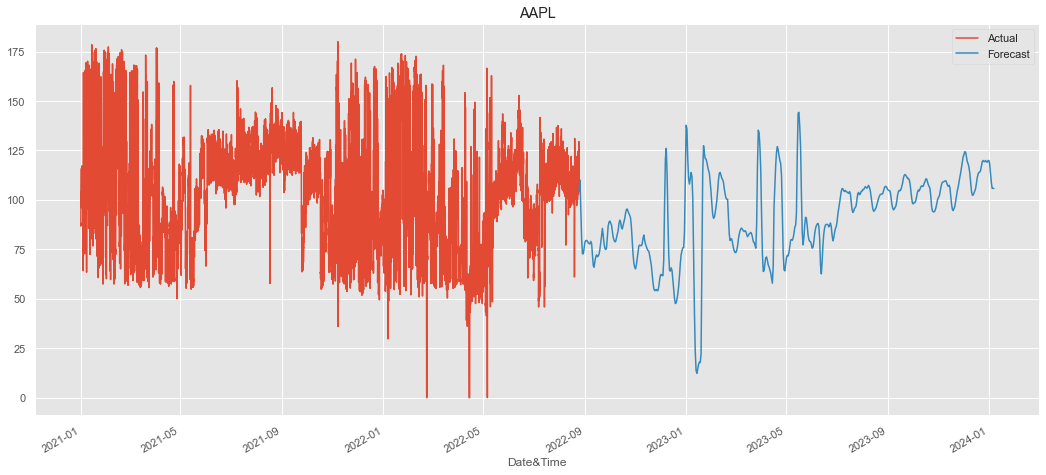

In [85]:
results.plot(title='AAPL')

In [59]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(2860, 1)

In [60]:
inputs

array([[113.72],
       [115.14],
       [113.78],
       ...,
       [119.26],
       [111.4 ],
       [104.24]])

In [61]:
len(inputs)


2860

In [62]:
# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 2860):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_MegaWatt = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_MegaWatt = sc.inverse_transform(predicted_MegaWatt)

C:\Users\shrad\anaconda3\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [63]:
X_test = np.array(X_test)
X_test

array([[[0.63135687],
        [0.63924051],
        [0.63168998],
        ...,
        [0.66211415],
        [0.61847657],
        [0.57872529]],

       [[0.63924051],
        [0.63168998],
        [0.64046191],
        ...,
        [0.61847657],
        [0.57872529],
        [0.32511659]],

       [[0.63168998],
        [0.64046191],
        [0.63724184],
        ...,
        [0.57872529],
        [0.32511659],
        [0.34654675]],

       ...,

       [[0.67732623],
        [0.6607817 ],
        [0.62491672],
        ...,
        [0.6853209 ],
        [0.69153897],
        [0.67988008]],

       [[0.6607817 ],
        [0.62491672],
        [0.63135687],
        ...,
        [0.69153897],
        [0.67988008],
        [0.66211415]],

       [[0.62491672],
        [0.63135687],
        [0.63924051],
        ...,
        [0.67988008],
        [0.66211415],
        [0.61847657]]])

In [64]:
True_MegaWatt = TestData["KW"].to_list()
dates = TestData.index.to_list()

In [65]:
predicted_MegaWatt

array([[110.043175],
       [ 94.65573 ],
       [ 80.083664],
       ...,
       [119.54943 ],
       [118.23542 ],
       [114.85893 ]], dtype=float32)

In [42]:
len(predicted_MegaWatt)

2800

In [43]:
len(True_MegaWatt)

2800

In [44]:
len(dates)

2800

In [45]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in predicted_MegaWatt ]
})

In [46]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2022-04-30 09:00:00,58.56,106.888962
1,2022-04-30 10:00:00,62.42,88.141365
2,2022-04-30 11:00:00,64.50,70.279236
3,2022-04-30 12:00:00,67.40,61.585220
4,2022-04-30 13:00:00,67.26,62.702713
...,...,...,...
2795,2022-08-24 20:00:00,124.56,122.777626
2796,2022-08-24 21:00:00,122.46,120.738731
2797,2022-08-24 22:00:00,119.26,119.296051
2798,2022-08-24 23:00:00,111.40,117.265106


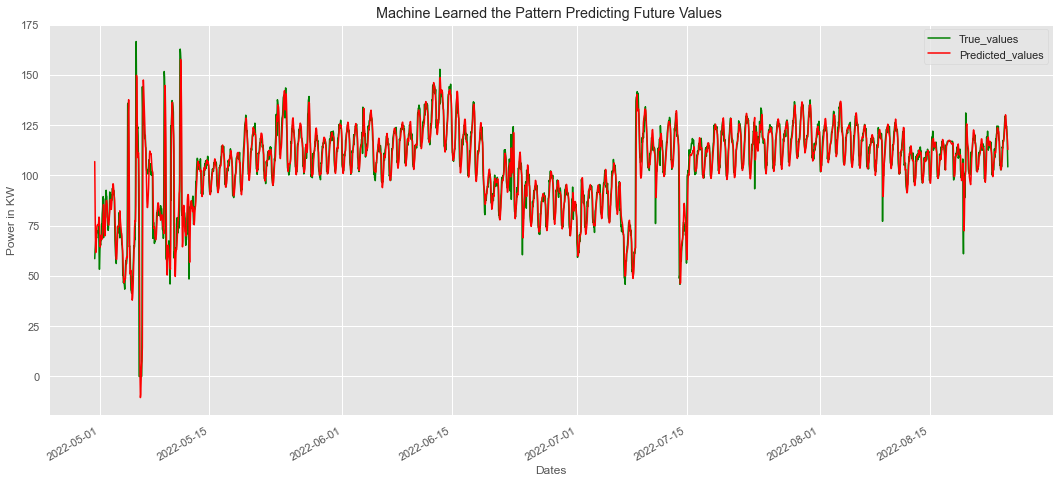

In [47]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.rcParams["figure.figsize"] = (18,8)
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in KW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend(['True_values','Predicted_values'])

In [79]:
df_past = Df_Total[['KW']].reset_index()
df_past

,Date&Time,KW
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [80]:
df_past.rename(columns={'index': 'Date', 'KW': 'Actual'}, inplace=True)
df_past

,Date&Time,Actual
0,2021-01-01 00:00:00,87.973333
1,2021-01-01 01:00:00,86.760000
2,2021-01-01 02:00:00,88.260000
3,2021-01-01 03:00:00,89.340000
4,2021-01-01 04:00:00,87.820000
...,...,...
17218,2022-08-24 20:00:00,124.560000
17219,2022-08-24 21:00:00,122.460000
17220,2022-08-24 22:00:00,119.260000
17221,2022-08-24 23:00:00,111.400000


In [81]:
df_past['Date'] = pd.to_datetime(df_past['Date&Time'])
df_past['Date']
# df_past['Forecast'] = np.nan
# df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

0       2021-01-01 00:00:00
1       2021-01-01 01:00:00
2       2021-01-01 02:00:00
3       2021-01-01 03:00:00
4       2021-01-01 04:00:00
                ...        
17218   2022-08-24 20:00:00
17219   2022-08-24 21:00:00
17220   2022-08-24 22:00:00
17221   2022-08-24 23:00:00
17222   2022-08-25 00:00:00
Name: Date, Length: 17223, dtype: datetime64[ns]

In [82]:
df_past

,Date&Time,Actual,Date
0,2021-01-01 00:00:00,87.973333,2021-01-01 00:00:00
1,2021-01-01 01:00:00,86.760000,2021-01-01 01:00:00
2,2021-01-01 02:00:00,88.260000,2021-01-01 02:00:00
3,2021-01-01 03:00:00,89.340000,2021-01-01 03:00:00
4,2021-01-01 04:00:00,87.820000,2021-01-01 04:00:00
...,...,...,...
17218,2022-08-24 20:00:00,124.560000,2022-08-24 20:00:00
17219,2022-08-24 21:00:00,122.460000,2022-08-24 21:00:00
17220,2022-08-24 22:00:00,119.260000,2022-08-24 22:00:00
17221,2022-08-24 23:00:00,111.400000,2022-08-24 23:00:00


In [83]:
df_past['Forecast'] = np.nan
df_past['Forecast'] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17218   NaN
17219   NaN
17220   NaN
17221   NaN
17222   NaN
Name: Forecast, Length: 17223, dtype: float64

In [84]:
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]
df_past['Forecast'].iloc[-1]

C:\Users\shrad\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


104.24

In [85]:
Df_Total

,KW
Date&Time,
2021-01-01 00:00:00,87.973333
2021-01-01 01:00:00,86.760000
2021-01-01 02:00:00,88.260000
2021-01-01 03:00:00,89.340000
2021-01-01 04:00:00,87.820000
...,...
2022-08-24 20:00:00,124.560000
2022-08-24 21:00:00,122.460000
2022-08-24 22:00:00,119.260000


In [86]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future 

,Date,Actual,Forecast


In [87]:
n_forecast = 30
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Date'] 

0    2022-08-26
1    2022-08-27
2    2022-08-28
3    2022-08-29
4    2022-08-30
5    2022-08-31
6    2022-09-01
7    2022-09-02
8    2022-09-03
9    2022-09-04
10   2022-09-05
11   2022-09-06
12   2022-09-07
13   2022-09-08
14   2022-09-09
15   2022-09-10
16   2022-09-11
17   2022-09-12
18   2022-09-13
19   2022-09-14
20   2022-09-15
21   2022-09-16
22   2022-09-17
23   2022-09-18
24   2022-09-19
25   2022-09-20
26   2022-09-21
27   2022-09-22
28   2022-09-23
29   2022-09-24
Name: Date, dtype: datetime64[ns]

<AxesSubplot:title={'center':'AAPL'}, xlabel='Date'>

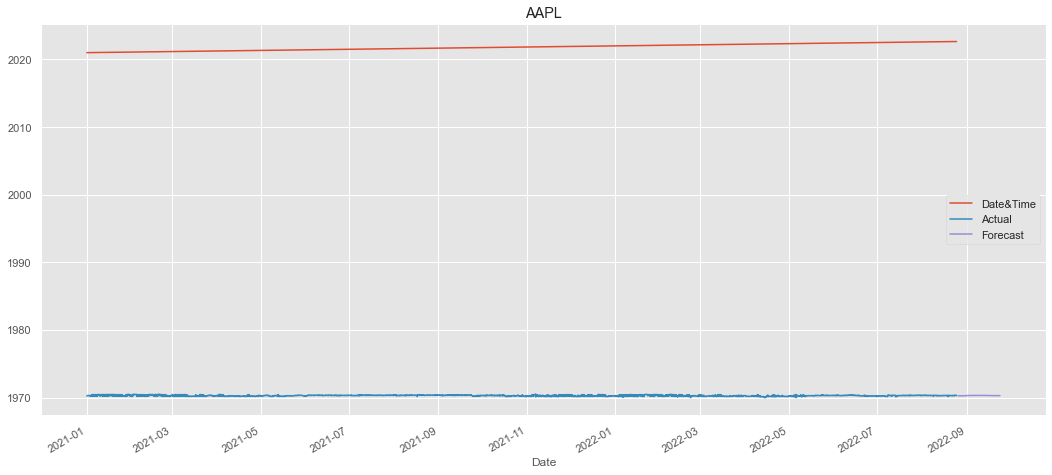

In [88]:
df_future['Forecast'] = Y_.flatten()
df_future['Forecast']
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')

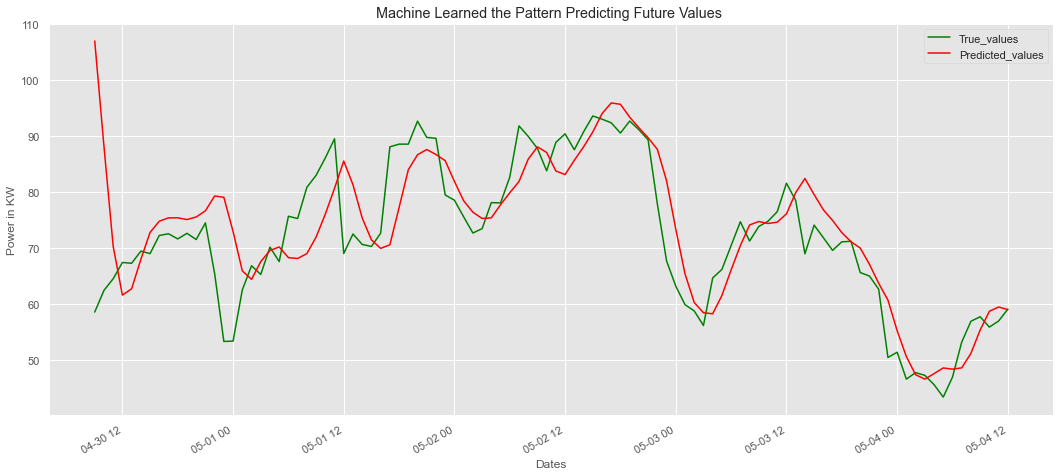

In [89]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates[:100]
y = True_MegaWatt[:100]

y1 = predicted_MegaWatt[:100]

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.rcParams["figure.figsize"] = (18,8)
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in KW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend(['True_values','Predicted_values'])

In [68]:
y= Df_Total['KW'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

In [69]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)



In [70]:
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# fit the model


In [71]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# generate the forecasts


In [72]:
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame


C:\Users\shrad\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:title={'center':'AAPL'}, xlabel='Date'>

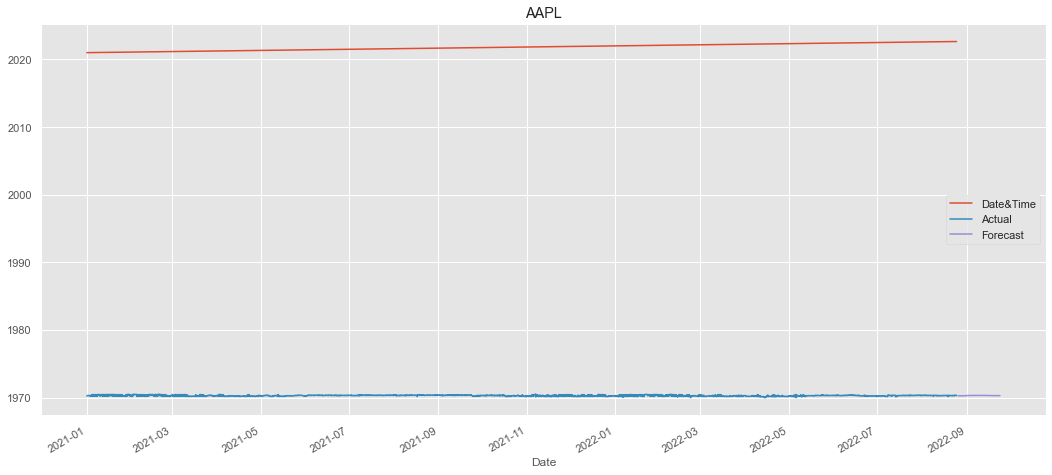

In [74]:
df_past = Df_Total[['KW']].reset_index()
df_past.rename(columns={'index': 'Date', 'KW': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date&Time'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title='AAPL')